**Linear Regression + L1 regularization**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


In [2]:
df = pd.read_csv("HousingData.csv")


In [3]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Create Lasso Model**

**Why alpha = 0.1?**

**Small enough to keep features, Big enough to show zero coefficients**

In [10]:
lasso = Lasso(alpha=0.1)

In [11]:
lasso.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [12]:
lasso.coef_


array([-0.73087259,  0.25878672, -0.25833267,  0.79704905, -1.48858478,
        3.49627689, -0.33173104, -2.41291217,  0.40653992, -0.22847771,
       -1.83359817,  1.01287185, -3.09390721])

**Feature selection clearly dekho**

In [13]:
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef


CRIM      -0.730873
ZN         0.258787
INDUS     -0.258333
CHAS       0.797049
NOX       -1.488585
RM         3.496277
AGE       -0.331731
DIS       -2.412912
RAD        0.406540
TAX       -0.228478
PTRATIO   -1.833598
B          1.012872
LSTAT     -3.093907
dtype: float64

In [14]:
lasso_coef[lasso_coef == 0]


Series([], dtype: float64)

In [15]:
y_pred_lasso = lasso.predict(X_test_scaled)


**Residual Plot**

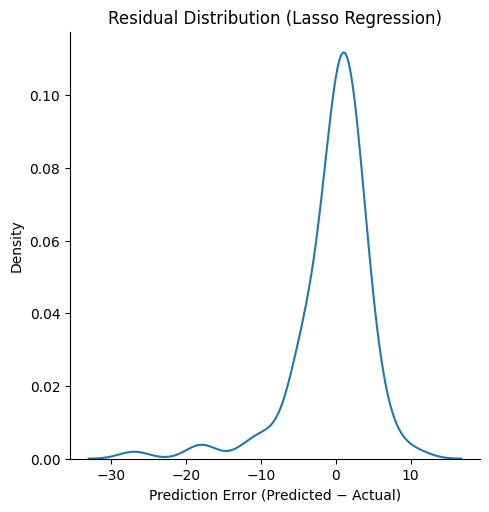

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_pred_lasso - y_test

sns.displot(residuals, kind="kde")
plt.title("Residual Distribution (Lasso Regression)")
plt.xlabel("Prediction Error (Predicted − Actual)")
plt.show()


**Effect of Alpha on Feature Selection**

In [17]:
alphas = [0.01, 0.1, 1, 10]


In [18]:
for a in alphas:
    l = Lasso(alpha=a)
    l.fit(X_train_scaled, y_train)
    
    print(f"Alpha = {a}")
    print((pd.Series(l.coef_, index=X.columns) != 0).sum(), "features selected\n")


Alpha = 0.01
13 features selected

Alpha = 0.1
13 features selected

Alpha = 1
6 features selected

Alpha = 10
0 features selected



**Alpha ↑ → features ↓**

**High alpha → very simple model**